In [141]:
import numpy as np
import os
import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

In [120]:
### PCA with original data

### find current directory
cwd = os.path.abspath(os.getcwd())
with open(cwd + '/p1/X.npy', 'rb') as file:
    X_data = np.load(file)
    print(X_data.shape)
    #print(X_data)

    # largest_col1 = np.max(X_data[:, 0])
    # print(np.max(X_data[:, 0]))
    # #print(X_data[:, 0])
    # log2_largest_col1 = np.log2(largest_col1+1)
    # print(log2_largest_col1)

    # ### transform data with log2
    # log2_X_data = np.log2(X_data)

    ### PCA on the original data
    pca1 = PCA(n_components=40)
    pca_X = pca1.fit(X_data)
    pca1_var_ratio = pca1.explained_variance_ratio_
    print(pca1_var_ratio)

    # ### PCA on the tranformed data (log2)
    # pca2 = PCA(n_components=40)
    # pca_logX= pca2.fit(log2_X_data)
    # pca2_var_ratio = pca2.explained_variance_ratio_
    # print(pca2.explained_variance_ratio_)

    pca1_cumsum = np.cumsum(pca1_var_ratio)
    print(pca1_cumsum)

    pca1_significant = pca1_cumsum > 0.85
    #print(pca1_significant)

    pca1_first_element = np.argwhere(pca1_significant)[0] +1
    print(pca1_first_element)




(511, 45768)
[0.42779671 0.14804008 0.05785528 0.04294885 0.02411034 0.0167119
 0.01409453 0.01114905 0.00960092 0.00709494 0.00630011 0.00590574
 0.00513572 0.00492604 0.00441135 0.00432671 0.00389986 0.00371031
 0.00360066 0.00354071 0.00342186 0.00335451 0.00317377 0.00304992
 0.00297602 0.00293219 0.00282557 0.00279549 0.00273468 0.00269059
 0.00263851 0.00254135 0.00247779 0.0024723  0.0024085  0.00236782
 0.00235049 0.00230487 0.0021955  0.0021734 ]
[0.42779671 0.57583679 0.63369207 0.67664091 0.70075126 0.71746316
 0.73155769 0.74270674 0.75230766 0.7594026  0.76570271 0.77160845
 0.77674417 0.78167021 0.78608156 0.79040827 0.79430813 0.79801844
 0.80161909 0.8051598  0.80858166 0.81193617 0.81510994 0.81815986
 0.82113587 0.82406806 0.82689363 0.82968912 0.8324238  0.83511439
 0.83775289 0.84029424 0.84277203 0.84524434 0.84765284 0.85002066
 0.85237114 0.85467601 0.85687151 0.85904491]
[36]


In [121]:
with open(cwd + '/p1/X.npy', 'rb') as file:
    X_data = np.load(file)
    print(X_data.shape)

    log2_X_data = np.where(X_data != 0.0, np.log2(X_data+1), 0)
    #print(log2_X_data)

    ### PCA on the transformed data data
    pca2 = PCA(n_components=400)
    pca_log2X= pca2.fit(log2_X_data)
    pca2_var_ratio = pca2.explained_variance_ratio_
    print(pca2_var_ratio)

    # # ### PCA on the tranformed data (log2)
    # # pca2 = PCA(n_components=40)
    # # pca_logX= pca2.fit(log2_X_data)
    # # pca2_var_ratio = pca2.explained_variance_ratio_
    # # print(pca2.explained_variance_ratio_)

    pca2_cumsum = np.cumsum(pca2_var_ratio)
    print(pca2_cumsum)

    pca2_significant = pca2_cumsum > 0.85
    #print(pca2_significant)

    pca2_first_element = np.argwhere(pca2_significant)[0] +1
    print(pca2_first_element)

(511, 45768)
[0.13887565 0.06882332 0.03042886 0.01353755 0.01241041 0.0068265
 0.00579699 0.00485573 0.00462978 0.0040596  0.0035037  0.0034537
 0.00328038 0.00326607 0.00323885 0.00318919 0.0031609  0.00311759
 0.00309982 0.00309462 0.00307809 0.00306922 0.00304941 0.00304466
 0.00301649 0.00298543 0.00297404 0.00295755 0.00294636 0.00292962
 0.00290861 0.00288593 0.00288146 0.00286691 0.00285234 0.00284978
 0.00283525 0.00282548 0.00280256 0.00279562 0.00277744 0.00276948
 0.00275881 0.00274066 0.00272443 0.00271318 0.00269455 0.00268808
 0.00268541 0.00266226 0.00263719 0.00262433 0.00261028 0.00259539
 0.00259162 0.00258305 0.00256453 0.00255906 0.0025393  0.00251705
 0.00250385 0.00246199 0.00243914 0.00236816 0.00233006 0.00231843
 0.00222614 0.0022172  0.00218879 0.00213378 0.00211409 0.00208822
 0.00206358 0.0020416  0.00203255 0.00202436 0.00200421 0.0019956
 0.00196703 0.00196324 0.00195544 0.00193742 0.00193602 0.00193391
 0.00192819 0.00191197 0.0019005  0.00189404 0.00188

In [122]:
print(log2_X_data)
print(log2_X_data[0, :])

[[0.         0.         7.07526846 ... 0.         0.         0.        ]
 [0.         0.         5.93675902 ... 0.         0.         0.        ]
 [0.         0.         7.02917267 ... 0.         0.         0.        ]
 ...
 [0.         0.         7.11270993 ... 0.         0.         0.        ]
 [0.         0.         7.45751589 ... 0.         0.         0.        ]
 [0.         0.         6.65085731 ... 0.         0.         0.        ]]
[0.         0.         7.07526846 ... 0.         0.         0.        ]


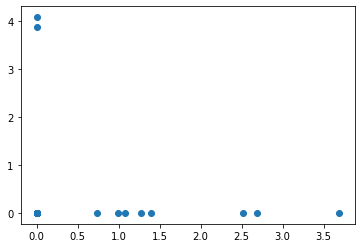

In [123]:
# Scatter plot
#plt.scatter(X_data[0, :], X_data[1, :])
plt.scatter(log2_X_data[:, 0], log2_X_data[:, 1])

# Display the plot
plt.show()

(511, 45768)
(511, 2)


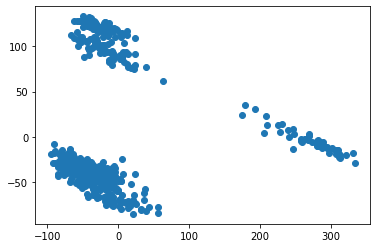

In [124]:
pca3 = PCA(n_components=2)
pca3.fit(log2_X_data)
log2_X_pca = pca3.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca.shape)


# Scatter plot
plt.scatter(log2_X_pca[:, 0], log2_X_pca[:, 1])

# Display the plot
plt.show()

(511, 45768)
(511, 2)


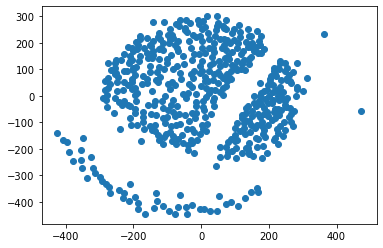

In [125]:
mds = MDS(n_components=2)
mds.fit(log2_X_data)
log2_X_mds = mds.fit_transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_mds.shape)


# Scatter plot
plt.scatter(log2_X_mds[:, 0], log2_X_mds[:, 1])

# Display the plot
plt.show()

(511, 45768)
(511, 50)
(511, 45768)
(511, 2)


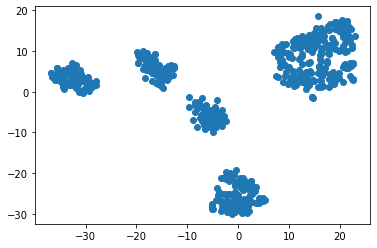

In [157]:
pca4 = PCA(n_components=50)
pca4.fit(log2_X_data)
log2_X_pca50 = pca4.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

In [139]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(log2_X_pca50)
log2_X_pca50_kmeans = kmeans.fit_transform(log2_X_pca50)
log2_X_pca50_kmeans_wgss = kmeans.inertia_(5)

# print(log2_X_pca50)
# print(log2_X_pca50_kmeans)
print(log2_X_pca50_kmeans_wgss)

TypeError: 'numpy.float64' object is not callable

In [142]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(log2_X_pca50)
label_kmc = kmeans.labels_
log2_X_pca50_kmeans = kmeans.fit_transform(log2_X_pca50)
print(log2_X_pca50_kmeans)



[[ 40.51955523 199.02705389 314.5029193  177.54182984 116.93418716]
 [ 37.48643243 196.02506154 321.80960433 173.70233205 118.19650536]
 [ 77.13309977 187.08340451 297.86484735 170.79834498  94.39832296]
 ...
 [180.31671081 137.12679864 310.48858365  62.19222174 166.85056511]
 [183.78870079 133.44765772 311.10816118  73.45564549 169.37706488]
 [195.81677308 148.5597661  315.35025163  76.9775279  180.07182125]]


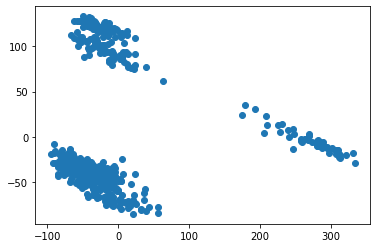

In [156]:
#kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(log2_X_pca50)
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(10)

# X_kmc_df[:][1]
plt.scatter(X_kmc_df[:][0], X_kmc_df[:][1])
plt.show()


(511, 45768)
(511, 50)


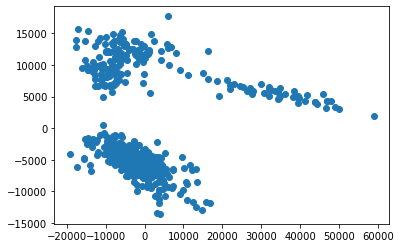

In [161]:
pca11 = PCA(n_components=50)
pca11.fit(X_data)
X_pca = pca11.transform(X_data)

print(X_data.shape)
print(X_pca.shape)


# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Display the plot
plt.show()

(511, 45768)
(511, 2)


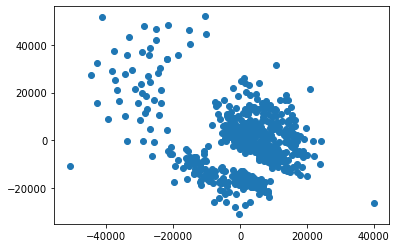

In [163]:
mds = MDS(n_components=2)
mds.fit(X_data)
X_mds = mds.fit_transform(X_data)

print(X_data.shape)
print(X_mds.shape)


# Scatter plot
plt.scatter(X_mds[:, 0], X_mds[:, 1])

# Display the plot
plt.show()